## Math 157
# Differential equations and modeling of endemic diseases (Python)
## By Alex Fernandez from Math 157, 2022

References:
- https://www.youtube.com/watch?v=vL6NfB7BKeY&ab_channel=BrianSullivan
- https://www.youtube.com/watch?v=k6nLfCbAzgo&t=608s&ab_channel=Numberphile
- https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model

# Goal

The goal of this part of the lecture is to learn how to graph differential equations and how to graph endemic diseases using the SIR and SIRE model.

# Graphing Ordinary Differential Equations (ODE's)

In python, we can solve and graph ordinary differential equations (ODE's) using odeint which takes in a function, initial conditions, and time points at which the solution should be reported. 

# Example

Let's start with a simple function $\frac{dy(t)}{dt} = -ky(t)$ and graph it

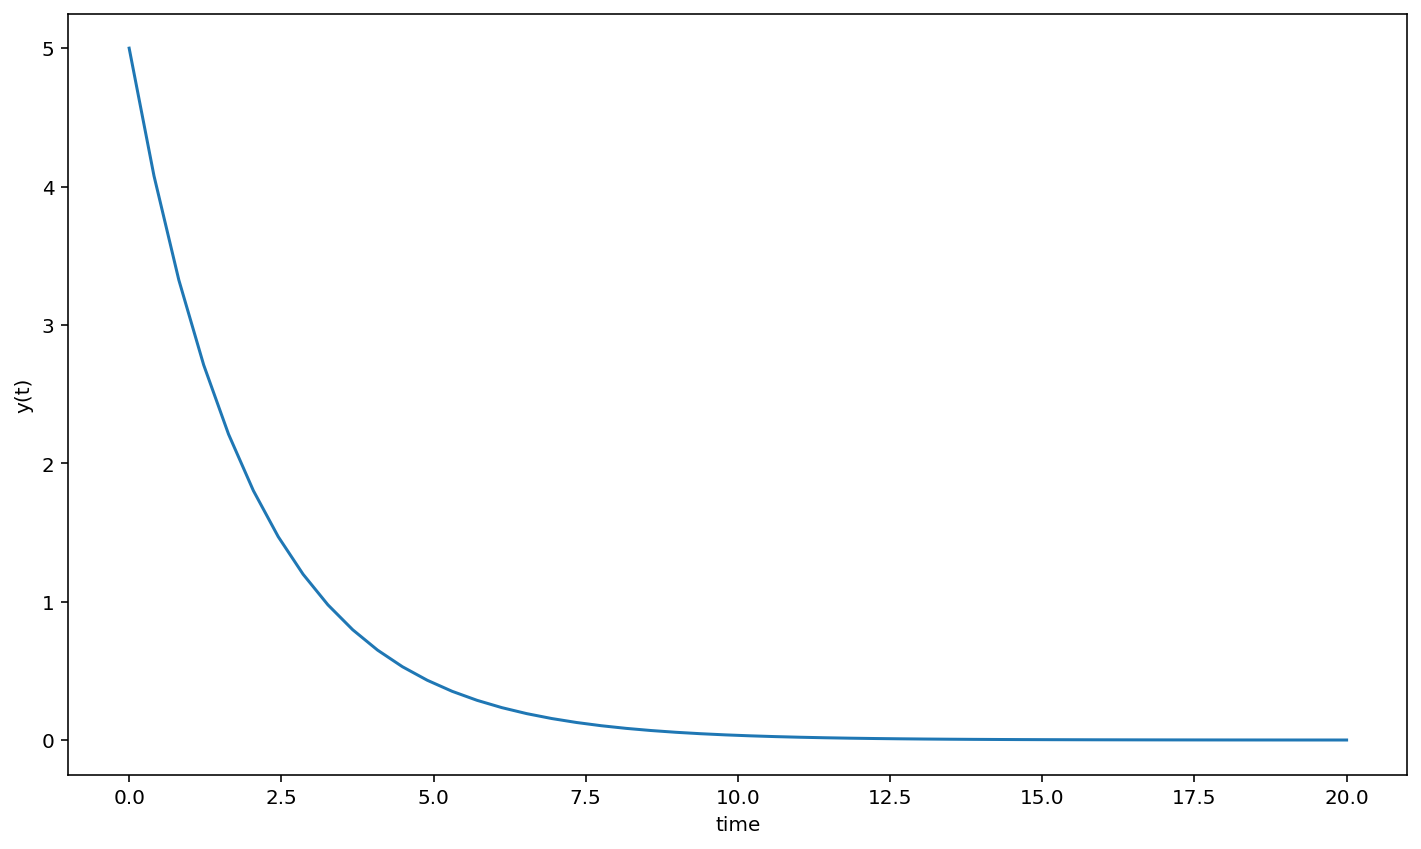

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.5
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

# Graphing endemic diseases using the SIR Model

The **SIR Model** is a simple model that can predict the rate at which humans catch a disease during an endemic over a period of time. The model consists of three sections:
- **S**: The number of susceptible people.
- **I**: The number of infectious people.
- **R**: The number of people recovered or removed (i.e. people who already became infected and either became immune or deceased).

In order for our model to work, a few assumptions have to be made. 
- There will be no births or immigration during the period of the endemic (i.e. the number of people in our population will remain constant)
- Recovery gives total immunity (i.e. once you are immune, you cannot get the disease again and spread it once more)
- Rate of increase in the infectives is proportional to the contact between susceptibles and infectives. This occurs at a constant rate
- Infectives recover/die at a constant rate

Because we are dealing with a rate of change, we are going to have to use differential equations. Specifically, ordinary differential equations (ODEs).
- For the susceptibles, we say that the **rate of change of S with respect to time** or $\frac{dS}{dt} = -\beta SI$ where $\beta$ is the rate of contact between susceptibles and infectives. The reason why it is negative is because as time goes on, the number of susceptibles will lower as they get infected which means the rate of change will **decrease**. We multiple $I$ and $S$ because the rate will depend on how many suscepibles there are and how many infectives there are.
- For the infectives, we say that the **rate of change of I with respect to time** or $\frac{dI}{dt} = \beta SI - \gamma I$ where $\gamma$ is the rate of recovery. The first part of the equation $\beta SI$ is obvious because we expect the rate of infectives to be inversely proportional to the rate of susceptibles because they depend on one another. However, we add the $- \gamma I$ bit because the number of infectives will decrease as they recover, so we say that they recover at a rate $\gamma$.
- For the recovered people, we say that the **rate of change of R with respect to time** or $\frac{dR}{dt} = \gamma I$ which makes sense because the rate at which people recover depend on both the number of infectives and the rate of recovery.

To better visualize how we arrive at these equations, we can look at the following image:

![screenshot%202022-03-17%20025126.png](attachment:screenshot%202022-03-17%20025126.png)

Notice how each equation appear to depend on one another. There is a clear relationship between these three differential equations.

Now that we have our differential equations, we can start coding our SIR model.

The first thing we should do is set up our SIR model function.

In [81]:
import numpy as np
import scipy.integrate 
import matplotlib.pyplot as plt

# define the parameters:
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    
    dS = -beta*S*I
    dI = beta*S*I - gamma*I
    dR = gamma*I
    
    return ([dS, dI, dR])

Next, we set up our initial conditions where:
- S0 = number of suscepibles at the start of the endemic (we expect this number to be reasonably high)
- I0 = number of infectives at the start of the endemic (we expect this number to be reasonably low)
- R0 = number of recovered people at the start of the endemic (we expect this number to be 0)

We will also be giving some arbitrary value to our rate of contact variable $\beta$ and our rate of recovery variable $\gamma$. We will then use scipy.integrate.odeint to differentiate our variables in our SIR_model function with respect to t using our initial conditions and including our other arguments passed onto the function $\beta$ and $\gamma$.

In [159]:
t = np.linspace(0, 100,1000)
S0 = 0.99
I0 = 0.01
R0 = 0
beta = 0.4 #Play around with this variable!
gamma = 0.2 #Play around with this variable!

solution = scipy.integrate.odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma)) #Differentiating
solution = np.array(solution) #Making our solution to an array to graph

Now that we have all our variables set up, we can plot our graph.

In [160]:
plt.figure(figsize=[6,4])
plt.plot(t, solution[:, 0], label="S'(t)")
plt.plot(t, solution[:, 1], label="I'(t)")
plt.plot(t, solution[:, 2], label="R'(t)")
plt.grid()
plt.legend()
plt.xlabel("Days")
plt.ylabel("% of the population")
plt.title("SIR Model")
plt.show()

Although the initial conditions should stay the same for the most part, feel free to change the $\beta$ and $\gamma$ values and re-plot the graph afterwards. You should notice that making the rate of contact $\beta$ a higher value causes the susceptibles to decrease overtime, the infected to increase at the beginning followed by a drop, and the recovered to increase at the beginning and eventually plateau. The reason for this is because the having a higher rate of contact means more susceptibles are contacting infected people, causing them to be infected. However, the infected eventually become recovered which is why you will see a drop. The recovered people grows and eventually flattens since there are no more infected people left to be recovered. **An important note to remember is that having a high recovered rate is not a good thing since one of our assumptions is that some of these people are deceased.

Following this thought process, what do you think will happen if you make the rate of recovery $\gamma$ higher? 

The **SIR Model** is a very basic model for measuring epidemics over time. Its simplicity and the many assumptions needed causes this model to not be a reliable model to accurately measure epidemics overtime. Nevertheless, it gives us a general idea of what we can expect to happen.

**Main takeaways:**
- Although not perfect, the SIR Model gives us a general idea of what we can expect during an endemic.
- The $\gamma$ and $\beta$ variables can cause significant changes. An increase in the rate of contact is a bad thing. An increase in the rate of recovery is a good thing
- Although we cannot change change the rate of recovery in real life, **we can change the rate of contact by practicing social distancing and washing your hands**

# Variation of the SIR Model: The SEIR Model

The **SEIR Model** is an extension of the SIR model by adding an additional variable 'E' that represents the number of individuals who have been exposed to the disease but have not yet been infective. 
- **S**: The number of susceptible people.
- **E**: The number of people exposed but not yet infective
- **I**: The number of infectious people.
- **R**: The number of people recovered or removed (i.e. people who already became infected and either became immune or deceased).

The only differences between the SEIR Model and SIR Model is the inclusion of the 'E' variable and the change of equation to the rate of infected people. We will also say that S + E + I + R = 1.
- For the exposed, we say that the **rate of change of E with respect to time** or $\frac{dE}{dt} = \beta SI -\alpha E$ where $\alpha$ is the rate of people exposed from an infective.
- For the infected, we say that the **rate of change of I with respect to time** or $\frac{dI}{dt} = \alpha E -\gamma I$).

With this model we can gather additional information about the population during an endemic that we couldn't get with the SIR Model. 

Similar to our SIR Model, let's set up our SIRE Model. Only this time, we will be including the 'E' and $\alpha$ variable, and changing the equation for the rate of infected people.

In [167]:
# initial number of infected and recovered individuals
E0 = 1/100
I0 = 0.01
R0 = 0.00
S0 = 1 - E0 - I0 - R0

alpha = 0.8 #Feel free to play around with these variables
gamma = 0.2
beta = 0.5

# SEIR model differential equations.
def SEIR(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -beta * s * i
    dedt =  beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt = gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 100, 1000)
soln = scipy.integrate.odeint(SEIR, [S0, E0, I0, R0], t, args=(alpha, beta, gamma))
soln = np.array(soln)

plt.figure(figsize=[6,4])
plt.plot(t, soln[:, 0], label="S'(t)")
plt.plot(t, soln[:, 1], label="I'(t)")
plt.plot(t, soln[:, 2], label="R'(t)")
plt.plot(t, soln[:, 3], label="E'(t)")
plt.grid()
plt.legend()
plt.xlabel("Days")
plt.ylabel("% of the population")
plt.title("SEIR Model")
plt.show()

Here, we see that similar to our SIR Model, S'(t) goes downward, I'(t) goes upward and then downward after some peak, and R'(t) goes upward. One thing to notice is that our new equation E'(t) has an upward trend that is almost inversely proportional to S'(t). 